In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [2]:
df_singapore = pd.read_csv('./datasets/singapore.csv')
df_asksingapore = pd.read_csv('./datasets/asksingapore.csv')

# Combine r\singapore and r\asksingapore posts in 50:50 proportions
df = pd.concat([df_singapore[:9990], df_asksingapore[:9990]]).reset_index(drop=True)

# Replace '[removed]' with whitespaces
df['selftext'].replace({'[removed]': ''}, inplace=True)

In [3]:
# Create function to automate word-cleaning

def clean_text(text):
    # Remove HTML elements e.g. tags
    review_text = BeautifulSoup(text).get_text()    
    
    # Remove non-alpha characters and nan
    letters_only = re.sub('[^a-zA-Z]|nan', " ", review_text)
    
    
    # Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # set(stopwords) to make faster search
    stops = set(stopwords.words('english'))
    
    # Remove stopwords
    meaningful_words = [w for w in words if not w in stops]

    # Stem words
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in meaningful_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in stemmed_words]   # doesnt add value in this case as words are more colloquial
    
    # Join back the words into one string separated by space
    return(" ".join(lemmatized_words))     # str_separator.join(iterable_string)

In [4]:
# Convert subreddit into binary variables where r\askSingapore=1, r\Singapore=0

df['subreddit'] = df['subreddit'].map(lambda x: 1 if x=='askSingapore' else 0)
df['subreddit']

0        0
1        0
2        0
3        0
4        0
        ..
19956    1
19957    1
19958    1
19959    1
19960    1
Name: subreddit, Length: 19961, dtype: int64

In [5]:
# Characters and word count of each title
df['char_count'] = df['title'].map(len)
df['word_count'] = df['title'].map(lambda x: len(x.split()))
df.head()

,subreddit,selftext,title,char_count,word_count
0,0,NaN,Singapore leaders congratulate Xi Jinping on h...,83,11
1,0,NaN,Woman caught by traffic police driving erratic...,101,15
2,0,NaN,Can anyone tell me anything about the house th...,111,19
3,0,NaN,Incredible Miniature Kuala Lumpur's Landmarks ...,61,8
4,0,NaN,Singapore's Sea cuts more jobs at e-commerce u...,64,10


## Visualizing Character Count and Word Count of Titles

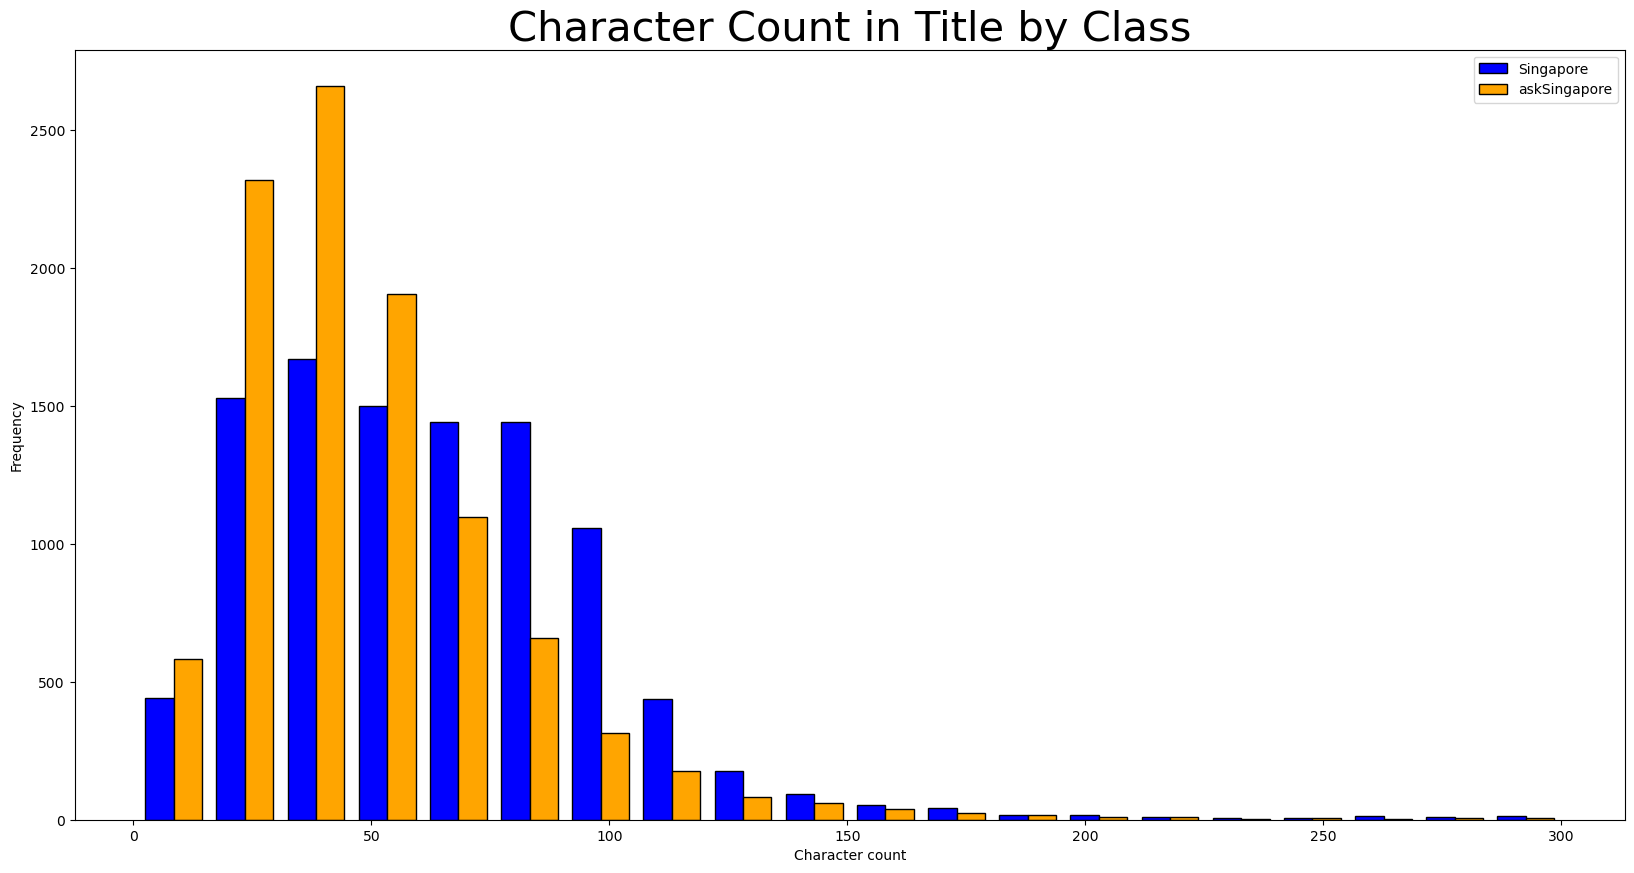

In [30]:
plt.figure(figsize=(20,10))
plt.hist([df[df['subreddit']==0]['char_count'], 
          df[df['subreddit']==1]['char_count']],
         bins=20, color=['blue', 'orange'], ec='k')
plt.title('Character Count in Title by Class', fontsize=30)
plt.legend(['Singapore', 'askSingapore'])
plt.xlabel('Character count')
plt.ylabel('Frequency');

# r\askSingapore tends to have a much tighter distribution of word and character counts than r\Singapore due likely to its more specific genre which mostly involves question format. 
# r\Singapore have a more balanced distribution with the average char_count around 60 characters.

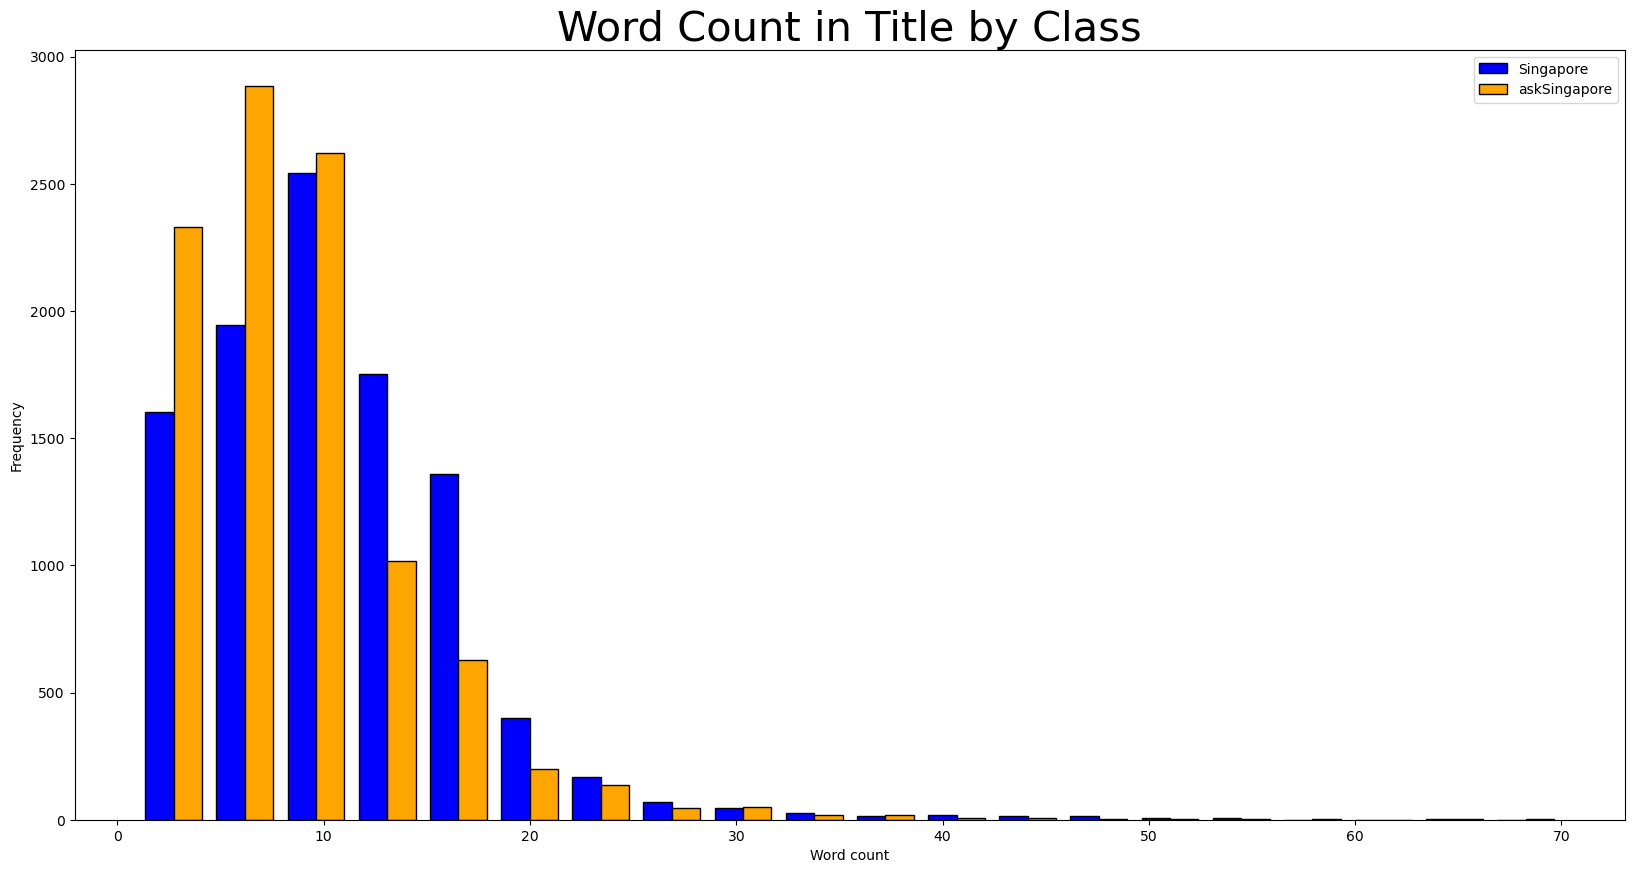

In [31]:
plt.figure(figsize=(20,10))
plt.hist([df[df['subreddit']==0]['word_count'], 
          df[df['subreddit']==1]['word_count']],
         bins=20, color=['blue', 'orange'], ec='k')
plt.title('Word Count in Title by Class', fontsize=30)
plt.legend(['Singapore', 'askSingapore']);
plt.xlabel('Word count')
plt.ylabel('Frequency');

In [8]:
# Clean, stem, and lemmatize Titles

df['title'] = df['title'].map(lambda x: clean_text(x))
df['title']

C:\Users\leagu\anaconda3\envs\datascience\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\leagu\anaconda3\envs\datascience\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


0        singapor leader congratul xi jinp reappoint ch...
1        woman caught traffic polic drive errat licenc ...
2        anyon tell anyth hous photo taken singapor hou...
3        incred miniatur kuala lumpur landmark tini museum
4         singapor sea cut job e commerc unit shope report
                               ...                        
19956                          work abroad fresh graduat u
19957    agreement place muslim commun prevent youth en...
19958                              anyon use torrent illeg
19959            legal insult someon public behav unreason
19960                                  place good internet
Name: title, Length: 19961, dtype: object

In [9]:
# Initialize a count vectorizer and fitting it

cvec = CountVectorizer(analyzer='word', min_df=3)
terms = cvec.fit_transform(df['title'])
text = pd.DataFrame(terms.todense(), columns=cvec.get_feature_names_out())
text.head()

,abandon,abduct,abil,abl,abnorm,abort,abroad,absolut,abt,abus,...,yusheng,zero,zig,zika,zilingo,zksync,zone,zoo,zoom,zoukout
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Insert target subreddit back into the vectorized text df

target_r = df['subreddit']   
text.insert(0, 'target_r', target_r)
text.head()

,target_r,abandon,abduct,abil,abl,abnorm,abort,abroad,absolut,abt,...,yusheng,zero,zig,zika,zilingo,zksync,zone,zoo,zoom,zoukout
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Looking at the most common words

In [12]:
# Create a dict for the most common words to the counts
term_counts = {col: text[col].sum() for col in text.columns[1:]}

# Create a dataframe for the Term Count Distribution ("tcd")
tcd = pd.DataFrame(term_counts, index=['counts'])
tcd = tcd.T
tcd.head()

,counts
abandon,17
abduct,3
abil,3
abl,34
abnorm,3


In [13]:
# Sort tcd by count values
tcd.sort_values(ascending=False, by='counts').head(10)

,counts
singapor,3443
get,787
anyon,753
sg,724
work,580
help,569
singaporean,556
peopl,535
job,523
year,515


In [14]:
# Take the top 20 words and visualize them into a heatmap
top20 = list(tcd.sort_values(by='counts', ascending=False).head(20).index)
top20.append('target_r')
top20

['singapor',
 'get',
 'anyon',
 'sg',
 'work',
 'help',
 'singaporean',
 'peopl',
 'job',
 'year',
 'question',
 'new',
 'need',
 'buy',
 'look',
 'recommend',
 'time',
 'go',
 'best',
 'like',
 'target_r']

C:\Users\leagu\AppData\Local\Temp\ipykernel_14928\1432813246.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


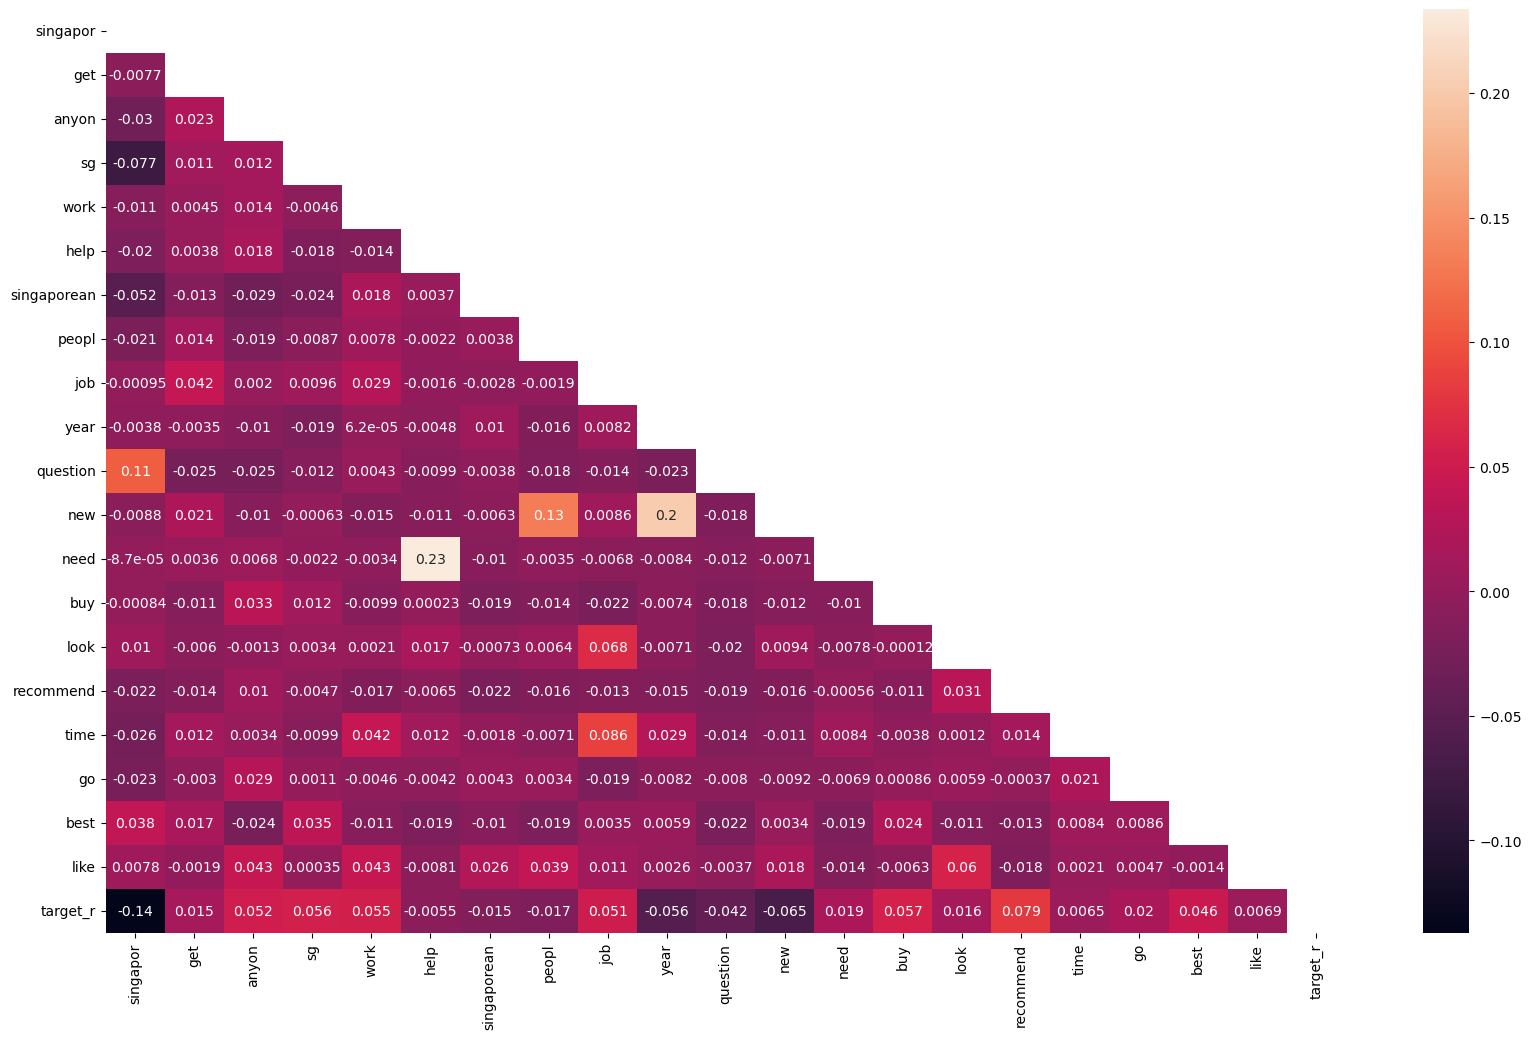

In [15]:
# Creating the correlation heatmap
plt.figure(figsize=(20,12))
corr = text[top20].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask, annot=True);

# No strong correlation between the 'target' and top20 most common words. 
# Strongest correlation is the negative corr betwen 'singapore' and 'target' of -0.14 which suggests that given a higher count of the word 'singapore', the more likely it will be 0.
# In other words, the word 'singapore' occurs relatively more frequently in r\Singapore than in r\askSingapore

In [16]:
# Getting the term frequency relative to target
text.groupby('target_r').mean().T.sort_values(by=0, ascending=False)

target_r,0,1
singapor,0.225338,0.119587
get,0.036455,0.042402
year,0.035053,0.016540
new,0.034151,0.013833
question,0.031948,0.018545
...,...,...
elder,0.000000,0.000301
coup,0.000000,0.000301
countertop,0.000000,0.000301
groupchat,0.000000,0.000401


In [17]:
text.groupby('target_r').sum().T.sort_values(by=0, ascending=False).head(35)

# At face value, groupby mean or sum yields the same results

target_r,0,1
singapor,2250,1193
get,364,423
year,350,165
new,341,138
question,319,185
singaporean,303,253
peopl,296,239
help,294,275
first,277,99
anyon,277,476


## Conduct Hypothesis Testing to find overlap of common words that have the same mean frequency)

In [18]:
# Getting the top 1000 words for both classes

top_n = 1000
top_words_singapore = list(text.groupby('target_r').mean().T.sort_values(0, ascending=False).head(top_n).index)
top_words_asksingapore = list(text.groupby('target_r').mean().T.sort_values(1, ascending=False).head(top_n).index)

# List of words that are in the top 1000 for both classes
top_words_overlap = [w for w in top_words_singapore if w in top_words_asksingapore]

print(f'Number of overlapped words: {len(top_words_overlap)}')   # there are 686 overlapped words
top_words_overlap


Number of overlapped words: 686


['singapor',
 'get',
 'year',
 'new',
 'question',
 'singaporean',
 'peopl',
 'help',
 'first',
 'anyon',
 'sg',
 'servic',
 'need',
 'man',
 'time',
 'look',
 'live',
 'work',
 'small',
 'nft',
 'say',
 'go',
 'like',
 'job',
 'day',
 'woman',
 'one',
 'hdb',
 'use',
 'price',
 'free',
 'know',
 'find',
 'buy',
 'public',
 'aircon',
 'flat',
 'best',
 'good',
 'take',
 'place',
 'old',
 'world',
 'make',
 'food',
 'school',
 'home',
 'claim',
 'scam',
 'would',
 'student',
 'want',
 'car',
 'compani',
 'polic',
 'mrt',
 'hous',
 'road',
 'friend',
 'pay',
 'china',
 'travel',
 'name',
 'still',
 'recommend',
 'worker',
 'covid',
 'month',
 'card',
 'countri',
 'charg',
 'worth',
 'life',
 'found',
 'think',
 'famili',
 'bto',
 'call',
 'driver',
 'app',
 'come',
 'bu',
 'share',
 'local',
 'malaysia',
 'chine',
 'got',
 'busi',
 'plea',
 'collect',
 'see',
 'move',
 'cost',
 'back',
 'open',
 'today',
 'give',
 'shop',
 'week',
 'show',
 'tri',
 'offic',
 'experi',
 'case',
 'advic',


_Conduct hypothesis testing on the top_words_overlap to see if those words have the same mean frequency in both classes. Overlapped words with the same mean frequency will likely add noise than signal in our model. We will set our alpha to 0.01._  

H<sub>0</sub>: The _r\Singapore_ and _r\askSingapore_ have the same mean frequency for word _x_.  
H<sub>1</sub>: The _r\Singapore_ and _r\askSingapore_ do not have the same mean frequency for word _x_.


In [19]:
# Import the scipy.stats library to access the t-test function
from scipy.stats import ttest_ind

# Storing p-value, t-stat, and word into a dict
ttest_dict={}

for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(text[text['target_r']==1][word],
                                text[text['target_r']==0][word])

In [20]:
ttest_dict

{'singapor': Ttest_indResult(statistic=-19.586974405762643, pvalue=1.2447730495116628e-84),
 'get': Ttest_indResult(statistic=2.1145986609918674, pvalue=0.03447653063701628),
 'year': Ttest_indResult(statistic=-7.921439329838568, pvalue=2.470053368678073e-15),
 'new': Ttest_indResult(statistic=-9.184362626795071, pvalue=4.5339730177882573e-20),
 'question': Ttest_indResult(statistic=-5.944407870678908, pvalue=2.8207280164464142e-09),
 'singaporean': Ttest_indResult(statistic=-2.0649320639287723, pvalue=0.03894231327272558),
 'peopl': Ttest_indResult(statistic=-2.450342069051598, pvalue=0.01428057845782171),
 'help': Ttest_indResult(statistic=-0.7763935704699196, pvalue=0.4375258400489813),
 'first': Ttest_indResult(statistic=-9.106095486080465, pvalue=9.325120279909782e-20),
 'anyon': Ttest_indResult(statistic=7.384584439392366, pvalue=1.589382776193858e-13),
 'sg': Ttest_indResult(statistic=7.97098204156365, pvalue=1.6582664746345577e-15),
 'servic': Ttest_indResult(statistic=-7.82229

_Looking at the p-values of the words in the ttest_dict, we can conclude the following:_  

* Accept H<sub>0</sub> for:  
    * say, peopl, help, singaporean, one, etc
* Reject H<sub>0</sub> for:  
    * say, singapor, new, first, anyon, etc
    
_Therefore, words for which we accepted the null hypothesis can be included in our stop words list since they will likely only add noise. The words for which we rejected the null hypothesis will be important in identifying signals in our model._

In [28]:
# Get the words that have same mean frequency between both classes

words_with_same_mean = []

for word in ttest_dict.keys():
    if ttest_dict[word][1] > 0.01:   # if p-value > alpha of 0.01, we accept null hypothesis
            words_with_same_mean.append(word)

words_with_same_mean

# Out of the 641 overlapped words, there are 508 words below which can be removed as stopwords.

['get',
 'singaporean',
 'peopl',
 'help',
 'time',
 'look',
 'like',
 'day',
 'one',
 'use',
 'take',
 'make',
 'food',
 'school',
 'student',
 'want',
 'car',
 'compani',
 'mrt',
 'friend',
 'pay',
 'travel',
 'still',
 'month',
 'card',
 'life',
 'famili',
 'bto',
 'app',
 'bu',
 'share',
 'local',
 'malaysia',
 'chine',
 'got',
 'busi',
 'plea',
 'see',
 'move',
 'back',
 'open',
 'give',
 'shop',
 'tri',
 'offic',
 'plan',
 'visit',
 'drive',
 'post',
 'onlin',
 'child',
 'part',
 'test',
 'lost',
 'interest',
 'foreign',
 'game',
 'salari',
 'chang',
 'ask',
 'sell',
 'data',
 'someon',
 'carousel',
 'pas',
 'group',
 'grab',
 'issu',
 'thought',
 'stay',
 'happen',
 'play',
 'offer',
 'could',
 'start',
 'custom',
 'account',
 'pr',
 'sign',
 'way',
 'money',
 'hour',
 'increas',
 'airport',
 'gener',
 'ticket',
 'leav',
 'watch',
 'report',
 'right',
 'even',
 'miss',
 'market',
 'bank',
 'univers',
 'studi',
 'realli',
 'non',
 'becom',
 'christma',
 'cat',
 'expect',
 'last',

## Using TF-IDF to compare results to CountVectorizer

In [22]:
tfidf = TfidfVectorizer(min_df=3, max_df=1.0)

term_tfidf = tfidf.fit_transform(df['title'])
tfidf_df = pd.DataFrame(term_tfidf.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df.shape

(19961, 4900)

In [23]:
# Get the max, mean, sum for each word in the TFIDF vectorization
col_max = {col: [tfidf_df[col].max(),
                tfidf_df[col].mean(),
                tfidf_df[col].sum()] for col in tfidf_df.columns}

tf_df = pd.DataFrame(col_max, index=['max','mean','sum']).T
tf_df.head()

,max,mean,sum
abandon,0.813128,0.000392,7.823018
abduct,0.455062,0.000066,1.313548
abil,0.511371,0.000069,1.384097
abl,0.668124,0.000674,13.448975
abnorm,0.606305,0.000079,1.568156


In [24]:
tf_df.sort_values(by=['max','sum'], ascending=False).head(35)

,max,mean,sum
singapor,1.0,0.035040,699.431571
sg,1.0,0.011137,222.300644
get,1.0,0.010809,215.760735
help,1.0,0.009467,188.967325
work,1.0,0.009067,180.993886
job,1.0,0.008957,178.784454
question,1.0,0.008882,177.285295
singaporean,1.0,0.008389,167.460959
recommend,1.0,0.008358,166.826592
buy,1.0,0.008166,162.992567


## Sentiment Analysis by Class

In [25]:
# Initializing SentimentAnalyzer and create a dict
sia = SentimentIntensityAnalyzer()
dicts = []

# Getting a SIA score for each lemmatized title
for title in df['title']:
    scores = sia.polarity_scores(title)
    scores['text'] = title
    dicts.append(scores)
    
# Create a dataframe with the dicts, adding target
df_sentiment = pd.DataFrame(dicts)
df_sentiment['target_r'] = target_r

In [26]:
# Grouping sentiment scores by target
df_sentiment.groupby(by='target_r').mean()

C:\Users\leagu\AppData\Local\Temp\ipykernel_14928\1361558420.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sentiment.groupby(by='target_r').mean()


,neg,neu,pos,compound
target_r,,,,
0,0.070446,0.826409,0.100239,0.033026
1,0.056184,0.821840,0.120873,0.069129


_By sentiment analysis of Titles alone, there doesn't seem to be a clear difference between the sentiment of r\Singapore (target=0) and r\askSingapore (target=1). In general, both subreddits tend to be have positive compound scores but r\askSingapore has a slightly more positive sentiment which could be attributable to its more constructive feedback genres._   